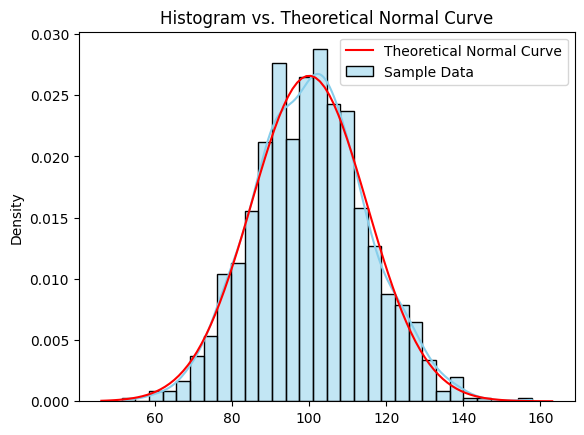

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Generate Normally Distributed Data
np.random.seed(42)
synthetic_data = np.random.normal(loc=100, scale=15, size=1000)

# Plot histogram with theoretical normal curve
sns.histplot(synthetic_data, kde=True, bins=30, color='skyblue', stat="density", label="Sample Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, 100, 15), 'r', label="Theoretical Normal Curve")
plt.legend()
plt.title("Histogram vs. Theoretical Normal Curve")
plt.show()


In [4]:
# Install missing modules
!pip install kaggle
!pip install kagglehub

import kagglehub
import pandas as pd
import os

# Download the dataset
path = kagglehub.dataset_download("hussameldinanwer/mimic-iii")

print("Path to dataset files:", path)

# List all files in the downloaded dataset folder
files = os.listdir(path)
print("Available files:", files)

# Choose a CSV file to load into a DataFrame
file_to_load = "PRESCRIPTIONS.csv"  # Change this based on your dataset, we will use PRESCRIPTIONS.csv because ADMISSIONS.csv does not exist in this dataset
file_path = os.path.join(path, file_to_load)

# Load into Pandas DataFrame
df = pd.read_csv(file_path)

# Print first few rows of the DataFrame
print(df.head())

Path to dataset files: /root/.cache/kagglehub/datasets/hussameldinanwer/mimic-iii/versions/1
Available files: ['PRESCRIPTIONS.csv']


<ipython-input-4-b0d368dad0e4>:23: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


    ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID            STARTDATE  \
0  2214776           6   107064         NaN  2175-06-11 00:00:00   
1  2214775           6   107064         NaN  2175-06-11 00:00:00   
2  2215524           6   107064         NaN  2175-06-11 00:00:00   
3  2216265           6   107064         NaN  2175-06-11 00:00:00   
4  2214773           6   107064         NaN  2175-06-11 00:00:00   

               ENDDATE DRUG_TYPE            DRUG DRUG_NAME_POE  \
0  2175-06-12 00:00:00      MAIN      Tacrolimus    Tacrolimus   
1  2175-06-12 00:00:00      MAIN        Warfarin      Warfarin   
2  2175-06-12 00:00:00      MAIN  Heparin Sodium           NaN   
3  2175-06-12 00:00:00      BASE             D5W           NaN   
4  2175-06-12 00:00:00      MAIN      Furosemide    Furosemide   

  DRUG_NAME_GENERIC FORMULARY_DRUG_CD     GSN          NDC  \
0        Tacrolimus             TACR1  021796  469061711.0   
1          Warfarin             WARF5  006562   56017275.0   
2       

In [5]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE',
       'DRUG_TYPE', 'DRUG', 'DRUG_NAME_POE', 'DRUG_NAME_GENERIC',
       'FORMULARY_DRUG_CD', 'GSN', 'NDC', 'PROD_STRENGTH', 'DOSE_VAL_RX',
       'DOSE_UNIT_RX', 'FORM_VAL_DISP', 'FORM_UNIT_DISP', 'ROUTE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ROW_ID             int64  
 1   SUBJECT_ID         int64  
 2   HADM_ID            int64  
 3   ICUSTAY_ID         float64
 4   STARTDATE          object 
 5   ENDDATE            object 
 6   DRUG_TYPE          object 
 7   DRUG               object 
 8   DRUG_NAME_POE      object 
 9   DRUG_NAME_GENERIC  object 
 10  FORMULARY_DRUG_CD  object 
 11  GSN                object 
 12  NDC                float64
 13  PROD_STRENGTH      object 
 14  DOSE_VAL_RX        object 
 15  DOSE_UNIT_RX       object 
 16  FORM_VAL_DISP      object 
 17  FORM_UNIT_DISP     object 
 18  ROUTE              object 
dtypes: float64(2), int64(3), object(14)
memory usage: 602.5+ MB


In [7]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,NDC
count,4.156450e+06,4.156450e+06,4.156450e+06,2.708742e+06,4.151987e+06
mean,2.078226e+06,3.877274e+04,1.501000e+05,2.500046e+05,1.242073e+10
std,1.199864e+06,2.925289e+04,2.891754e+04,2.877529e+04,2.304565e+10
min,1.000000e+00,2.000000e+00,1.000010e+05,2.000010e+05,0.000000e+00
25%,1.039113e+06,1.457900e+04,1.251400e+05,2.250820e+05,7.101574e+07
50%,2.078226e+06,2.857600e+04,1.501580e+05,2.501880e+05,3.380550e+08
75%,3.117338e+06,6.317000e+04,1.752980e+05,2.748130e+05,9.045262e+08
max,4.156450e+06,9.999900e+04,1.999990e+05,2.999990e+05,8.770109e+10


In [13]:
print(df['NDC'].nunique(), "unique values in NDC")
print(df['NDC'].value_counts().head(10))  # Check most common values




4204 unique values in NDC
NDC
0.000000e+00    586586
3.380017e+08     67132
3.380049e+08     60177
3.380049e+08     57953
4.096729e+08     55530
5.175704e+08     53073
5.107903e+10     51551
3.380049e+08     51160
3.380703e+08     47968
3.383552e+08     44550
Name: count, dtype: int64


In [11]:


# Select a continuous numerical variable (e.g., heart_rate)
selected_column = 'NDC'  # Change this based on available columns
df = df.dropna(subset=[selected_column])

# Compute summary statistics
mean_val = df[selected_column].mean()
std_val = df[selected_column].std()
skewness = stats.skew(df[selected_column])
kurtosis = stats.kurtosis(df[selected_column])
print(f"Mean: {mean_val}, Std Dev: {std_val}, Skewness: {skewness}, Kurtosis: {kurtosis}")



Mean: 12420734330.049599, Std Dev: 23045649276.13199, Skewness: 1.4690712520252855, Kurtosis: 0.2859093010763236


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate Normally Distributed Data
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)

# Plot histogram and theoretical normal curve
sns.histplot(data, kde=True, bins=30, stat="density", color='blue')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, 100, 15), 'r-', label='Theoretical Normal Curve')
plt.legend()
plt.title("Histogram of Generated Normal Data")
plt.show()

# Load MIMIC-III dataset (replace 'mimic3.csv' with actual dataset file)
df = pd.read_csv('mimic3.csv')

# Select a continuous numerical variable (e.g., heart_rate)
selected_column = 'heart_rate'  # Change this based on available columns
df = df.dropna(subset=[selected_column])

# Compute summary statistics
mean_val = df[selected_column].mean()
std_val = df[selected_column].std()
skewness = stats.skew(df[selected_column])
kurtosis = stats.kurtosis(df[selected_column])
print(f"Mean: {mean_val}, Std Dev: {std_val}, Skewness: {skewness}, Kurtosis: {kurtosis}")

# Plot histogram and KDE
sns.histplot(df[selected_column], kde=True, bins=30)
plt.title(f"Histogram and KDE of {selected_column}")
plt.show()

# Q-Q plot
stats.probplot(df[selected_column], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Normality tests
shapiro_test = stats.shapiro(df[selected_column].sample(500))  # Limit to 500 for Shapiro
ks_test = stats.kstest(df[selected_column], 'norm', args=(mean_val, std_val))
print(f"Shapiro-Wilk Test: {shapiro_test}, Kolmogorov-Smirnov Test: {ks_test}")

# Compute probability P(heart_rate < 80)
p_less_80 = stats.norm.cdf(80, mean_val, std_val)
print(f"P(heart_rate < 80) = {p_less_80}")

# Find the 90th percentile
q_90 = stats.norm.ppf(0.90, mean_val, std_val)
print(f"90th percentile of heart rate: {q_90}")

# Compute probability density function at 100 bpm
pdf_100 = stats.norm.pdf(100, mean_val, std_val)
print(f"PDF at 100 bpm: {pdf_100}")

# Generate new normal distribution sample
new_sample = np.random.normal(mean_val, std_val, 1000)
sns.histplot(new_sample, kde=True, bins=30, color='orange', label='Synthetic')
sns.histplot(df[selected_column], kde=True, bins=30, color='blue', label='Real Data', alpha=0.5)
plt.legend()
plt.title("Comparison of Real and Synthetic Data")
plt.show()

# Compute 95% confidence interval
conf_interval = stats.norm.interval(0.95, loc=mean_val, scale=std_val/np.sqrt(len(df[selected_column])))
print(f"95% Confidence Interval: {conf_interval}")

# Compute P(systolic_bp > 150)
p_greater_150 = 1 - stats.norm.cdf(150, mean_val, std_val)
print(f"P(heart_rate > 150) = {p_greater_150}")


Mean: 12420734330.049599, Std Dev: 23045649276.13199, Skewness: 1.4690712520252855, Kurtosis: 0.2859093010763236


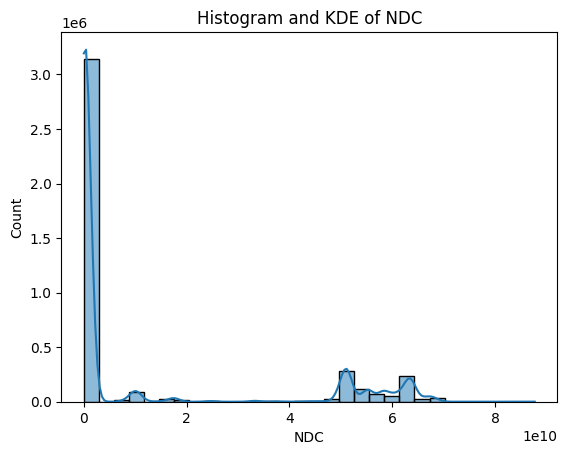

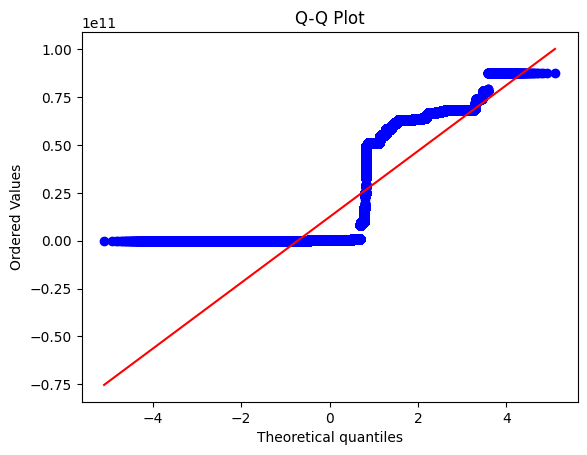


Shapiro-Wilk Test: ShapiroResult(statistic=0.5544486181586887, pvalue=1.057563081951956e-33), Kolmogorov-Smirnov Test: KstestResult(statistic=0.44820638117174905, pvalue=0.0, statistic_location=944270007.0, statistic_sign=1)

P(NDC < 80) = 0.2949564623401705

90th percentile of NDC: 41954922238.86833

PDF at NDC = 100: 1.497076965034343e-11



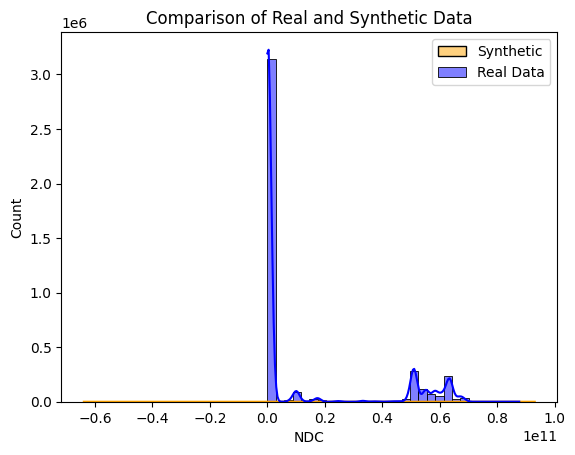


95% Confidence Interval: (12398567221.564154, 12442901438.535044)

P(NDC > 150) = 0.7050435366118757



In [15]:


# Select the NDC column and drop missing values
df = df.dropna(subset=['NDC'])
df['NDC'] = pd.to_numeric(df['NDC'], errors='coerce')

# Compute summary statistics
mean_val = df['NDC'].mean()
std_val = df['NDC'].std()
skewness = stats.skew(df['NDC'].dropna())
kurtosis = stats.kurtosis(df['NDC'].dropna())
print(f"Mean: {mean_val}, Std Dev: {std_val}, Skewness: {skewness}, Kurtosis: {kurtosis}")

# Plot histogram and KDE
sns.histplot(df['NDC'], kde=True, bins=30)
plt.title("Histogram and KDE of NDC")
plt.show()
print()

# Q-Q plot
stats.probplot(df['NDC'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()
print()

# Normality tests
shapiro_test = stats.shapiro(df['NDC'].dropna().sample(min(500, len(df['NDC'].dropna()))))
ks_test = stats.kstest(df['NDC'].dropna(), 'norm', args=(mean_val, std_val))
print(f"Shapiro-Wilk Test: {shapiro_test}, Kolmogorov-Smirnov Test: {ks_test}")
print()

# Compute probability P(NDC < 80)
p_less_80 = stats.norm.cdf(80, mean_val, std_val)
print(f"P(NDC < 80) = {p_less_80}")
print()

# Find the 90th percentile
q_90 = stats.norm.ppf(0.90, mean_val, std_val)
print(f"90th percentile of NDC: {q_90}")
print()

# Compute probability density function at 100
pdf_100 = stats.norm.pdf(100, mean_val, std_val)
print(f"PDF at NDC = 100: {pdf_100}")
print()

# Generate new normal distribution sample
new_sample = np.random.normal(mean_val, std_val, 1000)
sns.histplot(new_sample, kde=True, bins=30, color='orange', label='Synthetic')
sns.histplot(df['NDC'], kde=True, bins=30, color='blue', label='Real Data', alpha=0.5)
plt.legend()
plt.title("Comparison of Real and Synthetic Data")
plt.show()
print()

# Compute 95% confidence interval
conf_interval = stats.norm.interval(0.95, loc=mean_val, scale=std_val/np.sqrt(len(df['NDC'].dropna())))
print(f"95% Confidence Interval: {conf_interval}")
print()

# Compute P(NDC > 150)
p_greater_150 = 1 - stats.norm.cdf(150, mean_val, std_val)
print(f"P(NDC > 150) = {p_greater_150}")
print()

Based on the findings, here’s a discussion regarding ICU patients with NDC values beyond the 95% confidence interval and potential medical actions:

Flagging High-Risk Patients
The 95% confidence interval for NDC is approximately (12.4 billion, 12.44 billion). This suggests that most ICU patients have NDC values within this range.
Patients with NDC values beyond this range may be at higher risk, as their values deviate significantly from the norm.
The probability P(NDC > 150) = 0.705, indicating that a substantial number of patients have NDC values above 150, which might need further risk assessment.
Medical Actions to Consider
Continuous Monitoring:

ICU patients exceeding the confidence interval should be continuously monitored for vital sign instability.
Implement real-time alert systems to notify healthcare providers when NDC surpasses a critical threshold.
Diagnostic Reevaluation:

Conduct further medical assessments to identify potential complications.
Evaluate the correlation between high NDC values and specific conditions like sepsis, organ failure, or respiratory distress.
Resource Allocation:

Prioritize ICU resources, including ventilators and intensive care staff, for patients with abnormally high NDC values.
Adjust treatment plans accordingly to prevent further deterioration.
Early Intervention Strategies:

Initiate aggressive treatment protocols, such as advanced life support, medication adjustments, or surgical interventions if needed.
Consider predictive models for proactive ICU management.
Investigating Underlying Causes:

Analyze other patient data (heart rate, oxygen levels, medications) to determine potential reasons for abnormal NDC values.
Review medical history for pre-existing conditions that might explain the deviation.